## Objective & Observation:

Objective:
 - Increasing the batch size to 64 to check if the model trains better
 - Adding Dropout of 0.1 after every convolution step instead of two 0.2 dropouts after each covolution block - to check if it addresses the overfitting problem better and the model is trained better  
 - Start the learning rate at 0.003 and decrease it after each epoch - 
Reason:  In all the previous model, the accuracy is inconsistent, it increases to 99.25 at 13th epoch and decreases and increases to 99.27 at 20th epoch. this is because of have same learning rate.



---


Observation:
- After increasing the batch size to 64
    - The model trained faster
    - There was no major change in the validation accuracy
- After adding Dropout of 0.1 
    - The accuracy improves and Test Accuracy of 99.40 is achieved
- After changing the learning rate to 0.003 and decreasing it after each epoch
    - Test Accuracy of 99.43 is achieved in 18th epoch

In [0]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential

from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization


from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

*   Printing the number of data in X_train, dimension of each image and plotting the first image in X_train




(60000, 28, 28)


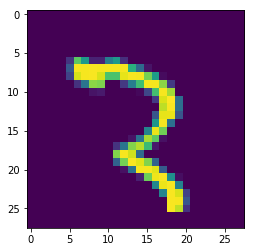

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[500])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

*   displays the first 10 output values in the output training dataset

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

* Converts each value in the output training and testing dataset into vector of dimension 1xnumber_of_classes
* The values in the vector will be 0. or 1. 
* Only one of the values in each vector will be 1, indicating the class to which the input data belongs to. Eg the first value in the y_train is 5, this will be converted into  [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]. 
* The 6th value in the vector will be 1 indicating class 5.
* The first value in the vector represents class 0, second value represents class 1 and so on.

* Convert 1-dimensional class arrays to 10-dimensional class matrices

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

* displays the first 10 output values in the output training dataset after conversion to vectors


In [0]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

## Training DNN Model

In [0]:
from keras.layers import Activation
model = Sequential()

model.add(Convolution2D(8, 3, 3, activation='relu', input_shape=(28,28,1))) # 26, RF: 3
model.add(BatchNormalization())

# Convolution block 1
model.add(Convolution2D(16, 3, 3, activation='relu')) #24, RF: 5
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Convolution2D(20, 3, 3, activation='relu')) #22, RF: 7
model.add(BatchNormalization())
model.add(Dropout(0.1))

# model.add(Dropout(0.3))

# Transition block 1
model.add(MaxPooling2D(pool_size=(2, 2))) # 11, RF: 14
model.add(Convolution2D(8, 1, 1, activation='relu')) # 11, RF: 14
model.add(BatchNormalization())
model.add(Dropout(0.1))


# Convolution block 2
model.add(Convolution2D(16, 3, 3, activation='relu')) #9, RF: 16
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Convolution2D(20, 3, 3, activation='relu')) #7, RF: 18
model.add(BatchNormalization())
model.add(Dropout(0.1))

# model.add(Dropout(0.3))

model.add(Convolution2D(10, 1, activation='relu')) #7, RF: 18
model.add(BatchNormalization())
model.add(Convolution2D(10, 7))

model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(20, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (1, 1), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launche

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 8)         80        
_________________________________________________________________
batch_normalization_8 (Batch (None, 26, 26, 8)         32        
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 24, 24, 16)        1168      
_________________________________________________________________
batch_normalization_9 (Batch (None, 24, 24, 16)        64        
_________________________________________________________________
dropout_6 (Dropout)          (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 22, 22, 20)        2900      
_________________________________________________________________
batch_normalization_10 (Batc (None, 22, 22, 20)        80        
__________

* Compiles the convolution model. 
* Compile method takes 3 parameters - loss, optimizer, metrics
* loss - lower the score, better the performance. value: categorical_crossentropy (commonly used)
* optimizer - controls the learning rate (determines how fast the optimal weights for the model are calculated)
* metrics - displays the accuracy metrics. indicates the accuracy of the trained model 

In [0]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler

def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

## Observation
- After increasing the batch size to 64
    - The model trained faster
    - There was no major change in the validation accuracy
- After adding Dropout of 0.1 
    - The accuracy improves and Test Accuracy of 99.40 is achieved
- After changing the learning rate to 0.003 and decreasing it after each epoch
    - Test Accuracy of 99.43 is achieved in 18th epoch



In [0]:
model.fit(X_train, Y_train, batch_size=64, nb_epoch=20, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 60000 samples, validate on 10000 samples
Epoch 1/20

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
60000/60000 [==============================] - 25s 420us/step - loss: 0.1590 - acc: 0.9497 - val_loss: 0.0543 - val_acc: 0.9837
Epoch 2/20

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
60000/60000 [==============================] - 18s 304us/step - loss: 0.0555 - acc: 0.9830 - val_loss: 0.0404 - val_acc: 0.9868
Epoch 3/20

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
60000/60000 [==============================] - 18s 308us/step - loss: 0.0423 - acc: 0.9866 - val_loss: 0.0434 - val_acc: 0.9848
Epoch 4/20

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
60000/60000 [==============================] - 18s 302us/step - loss: 0.0383 - acc: 0.9876 - val_loss: 0.0261 - val_acc: 0.9912
Epoch 5/20

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013181019.
60000/60000 [==

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
print(score)

[0.036891890601335214, 0.9886]


* The trained model predicts the output for all the input dataset in X_test


In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[9.21644792e-12 1.64206654e-07 4.12715326e-06 5.18118313e-08
  3.60710914e-07 1.19364199e-10 1.91028942e-17 9.99993205e-01
  6.93901603e-10 2.16547733e-06]
 [5.40889467e-08 1.69114145e-07 9.99999523e-01 1.46104018e-10
  2.49118365e-10 2.76379197e-10 1.86010666e-07 5.70938193e-11
  3.31840759e-08 5.77983706e-14]
 [4.74322187e-12 9.99998212e-01 1.44369583e-08 4.05388431e-11
  4.17996176e-07 2.54959822e-08 1.08775011e-09 1.37989718e-06
  1.02745625e-08 4.62864662e-08]
 [9.97561336e-01 5.60426705e-10 2.58570680e-07 3.06075854e-09
  3.73771094e-08 2.24538826e-06 2.43556057e-03 3.25126370e-09
  2.37649175e-07 3.14335409e-07]
 [4.23311939e-13 1.81482950e-15 7.86186727e-10 1.84236959e-10
  9.99983191e-01 2.29293494e-11 1.76278692e-09 2.24722534e-08
  2.90249957e-09 1.67625349e-05]
 [2.40194128e-12 9.99997854e-01 3.53185499e-08 3.65423525e-11
  4.20740747e-07 3.70860032e-09 5.64602150e-11 1.75329569e-06
  6.25872021e-09 4.89122982e-08]
 [5.66966266e-12 3.16245767e-08 2.68834829e-05 7.12565873e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

NameError: ignored